In [17]:
import numpy as np
import time

In [18]:
def make_dict(file_data,all_words):
    for word in file_data.split():
            if(len(word)>2):
                all_words[word]=all_words.get(word,0)+1
    return all_words

def process_file_data(file_data):
        file_data=file_data.replace("["," ")
        file_data=file_data.replace("]"," ")
        file_data=file_data.replace("\n"," ")
        file_data=file_data.replace("-"," ")
        file_data=file_data.replace("'"," ")
        file_data=re.sub('[:<>}/\\''^&;"",)*_#=(?.!|]', ' ', file_data)
        file_data=file_data.lower() #to lower case
        
        file_data=' '.join(file_data.split())#remove extras spaces in betwen
        #print(file_data)
        return file_data

def remove_stopwords(all_words):
    stopwords_1=stopwords.words('english')
    stopwords_2=['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']
    stopwords_3=["edu","cmu","apr","date","newsgroups","organization","writes","about",
                    "article","misc","than","com","srv","cantaloupe","das",]
    stopwords_list=[stopwords_1,stopwords_2,stopwords_3]
    for curr_list in stopwords_list:
        for curr_word in curr_list:
            if curr_word in all_words.keys():
                del all_words[curr_word]
  
    all_words=sorted(all_words.items(), key=lambda x: x[1],reverse=True)
    return all_words    

In [19]:
all_words={}
import re
import os
from nltk.corpus import stopwords

rootdir='C:\\Users\\Dhivya S\\Videos\\Captures\\TextClassification\\20_newsgroups'

for subdir, dirs, files in os.walk(rootdir):
    category=subdir.replace(rootdir+"\\","") # y value for corresponsing files
    for file in files:
        file_location=os.path.join(subdir, file)
        file_obj=open(file_location,'r')
        file_data=file_obj.read()
        file_data=process_file_data(file_data)
        all_words=make_dict(file_data,all_words) 
useful_words=remove_stopwords(all_words)         

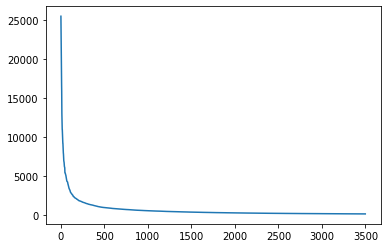

In [20]:
import matplotlib.pyplot as plt
vocabulary=[]
pts=[]
for i in range(3500): #choosing top 3500 words as vocabulary
    vocabulary.append(useful_words[i][0])
    pts.append(useful_words[i][1])
plt.plot(pts)

In [21]:
#making a base of first numpy array for data points and output
first_file_loc='C:\\Users\\Dhivya S\\Videos\\Captures\\TextClassification\\20_newsgroups\\alt.atheism\\49960'
file_obj=open(first_file_loc,'r')
file_data=file_obj.read()
file_data=process_file_data(file_data)
x=[]
for vocab in vocabulary:
    count=file_data.count(' '+vocab+' ') #find the frequency of the word in the file and append the count
    x.append(count)             
y_list=['alt.atheism'] #base for output data numpy array    

In [22]:
rootdir='C:\\Users\\Dhivya S\\Videos\\Captures\\TextClassification\\20_newsgroups'
for subdir, dirs, files in os.walk(rootdir):
    category=subdir.replace(rootdir+"\\","") # y value for corresponsing files
    for file in files:
        y_list.append(category)
        file_location=os.path.join(subdir, file)
        file_obj=open(file_location,'r')
        file_data=file_obj.read()
        file_data=process_file_data(file_data)
        x1=[]
        for vocab in vocabulary:
            count=file_data.count(' '+vocab+' ')
            x1.append(count) 
        x=np.vstack([x,x1])
y=np.array(y_list)       

In [23]:
x.shape,len(y) #shape of data numpy arrays and output numpy arrays

((19998, 3500), 19998)

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
#list(le.classes_)  
y=le.transform(y)  #to encode the class names (strings) to integers for feeding into the model
y

array([ 0,  0,  0, ..., 19, 19, 19], dtype=int64)

In [25]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y,test_size=0.25)

In [26]:
#IMPLEMENTING MULTINOMIAL NAIVE BAYES FROM SCRATCH

In [29]:
def fit(x_train,y_train): 
    result={}
    class_values=set(y_train)
    for current_class in class_values:
        result[current_class] = {}
        result["total_data"]=len(y_train)
        current_class_rows=(y_train==current_class)
        x_train_current=x_train[current_class_rows]
        y_train_current=y_train[current_class_rows]
        num_features = x_train.shape[1]
        result[current_class]["total_count"] = len(y_train_current)  #total rows present for given class
        for j in range(1, num_features + 1):
            result[current_class][j] =x_train_current[:,j-1].sum()    #sum of each feature of the given class =(sj)      
    return result  

def probability(dictionary, x, current_class):
    log_prob = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    num_features = len(dictionary[current_class].keys())-2 
    for j in range(1, num_features):
        word_count_for_feature=dictionary[current_class][j]+1 #retrieving sum of ocuurances of the particular vocabulary/feature
        total_rows_in_class=dictionary[current_class]["total_count"]+num_features
        current_feature_probablity = np.log(word_count_for_feature) - np.log(total_rows_in_class)
        log_prob=log_prob + current_feature_probablity*x[j - 1]       
    return log_prob

def predictSingleFile(dictionary, x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        if (current_class == "total_data"):
            continue
        p_current_class = probability(dictionary, x, current_class)
        if (first_run) or (p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

def predict(dictionary, x_test):
    y_pred = []
    for x in x_test:
        x_class = predictSingleFile(dictionary, x)
        y_pred.append(x_class)
    return y_pred

In [30]:
dictionary = fit(X_train,Y_train)
print("Fitted")
Y_pred = predict(dictionary,X_test)
print("Predicted")

Fitted
Predicted


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       233
           1       0.70      0.82      0.76       261
           2       0.94      0.53      0.68       257
           3       0.78      0.81      0.79       242
           4       0.91      0.82      0.86       268
           5       0.62      0.85      0.72       232
           6       0.94      0.71      0.81       277
           7       0.93      0.84      0.88       266
           8       0.97      0.85      0.91       253
           9       1.00      0.85      0.92       250
          10       0.91      0.98      0.94       257
          11       0.78      1.00      0.87       240
          12       0.94      0.63      0.75       256
          13       0.96      0.89      0.92       219
          14       0.80      0.92      0.86       234
          15       0.97      1.00      0.99       261
          16       0.82      0.84      0.83       261
          17       0.68    

In [ ]:
#MULTINOMIAL BAYES USING SKLEARN

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
clf = MultinomialNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       233
           1       0.76      0.77      0.77       261
           2       0.90      0.71      0.79       257
           3       0.72      0.83      0.77       242
           4       0.79      0.89      0.83       268
           5       0.81      0.74      0.77       232
           6       0.88      0.91      0.89       277
           7       0.90      0.94      0.92       266
           8       0.92      0.97      0.95       253
           9       0.96      0.95      0.96       250
          10       0.97      0.95      0.96       257
          11       0.99      0.95      0.97       240
          12       0.91      0.91      0.91       256
          13       0.98      0.90      0.94       219
          14       0.94      0.96      0.95       234
          15       0.97      1.00      0.99       261
          16       0.80      0.94      0.86       261
          17       0.92    

In [44]:
print("Accuaracy of inbuilt sklearn's MultinomialNB on the same data is 0.87")
print("Our accuarcy is 0.82")

Accuaracy of inbuilt sklearn's MultinomialNB on the same data is 0.87
Our accuarcy is 0.82
